#**ARTIFICIAL INTELLIGENCE PROJECT SPRING 2024**
#**Group Members IDs:**
#K21-3156
#K21-3281
#K21-4824

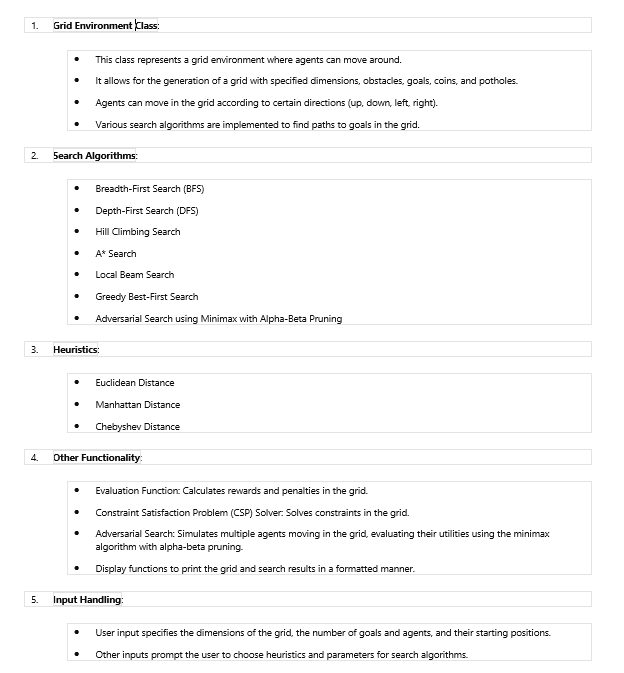

In [ ]:
!pip install python-constraint
#This will install the python-constraint package using pip. The python-constraint package provides functionality for solving constraint
# satisfaction problems (CSPs),which is used in the code for solving constraints in the grid environment.

  Preparing metadata (setup.py) ... done
  Created wheel for python-constraint: filename=python_constraint-1.4.0-py2.py3-none-any.whl size=24058 sha256=eca918a092721deaad0dc6924ed6cd654bd1cfebea408a20cc474c08e225c4c0
  Stored in directory: /root/.cache/pip/wheels/2e/f2/2b/cb08b5fe129e4f69b7033061f256e5c551b0aa1160c2872aee
Successfully built python-constraint


In [ ]:
import random #used to generate random positions for agents and goals in the grid environment.
import heapq #used to implement priority queues for A* search and other algorithms.
import math #used for mathematical operations, such as calculating distances in heuristic functions.
from collections import deque #used to implement queues for breadth-first search (BFS) and other algorithms.
from constraint import Problem #used to define and solve constraint satisfaction problems (CSPs) in the grid environment.

#constructor method for the GridEnvironment class. It initializes the grid environment with dimensions m rows and n columns.
#It also sets the number of goals and number of agents in the environment.
#Additionally, it generates the grid, starts, and goals based on the specified parameters.
class GridEnvironment:
    def __init__(self, m, n, num_goals, num_agents):
        self.m=m #rows
        self.n=n #col
        self.num_agents=num_agents #sets no of agents for a multi agent prob
        self.grid=[[None for _ in range(n)] for _ in range(m)]
        self.starts=[]
        self.goals=[]
        self.generate_grid(num_goals)
        self.generate_starts()

    #generates starting positions for the agents randomly on the grid. It ensures that no two agents start in the same position or
    # on a barrier ('X'). It populates the starts list with the starting positions of the agents and updates the grid accordingly.
    def generate_starts(self):
        for _ in range(self.num_agents):
          ##Lets generate a random starting position (row, column)
            start_pos=(random.randint(0, self.m - 1), random.randint(0, self.n - 1))
            ##Check if the generated position is already occupied by another agent or a barrier ('X')
            while start_pos in self.starts or self.grid[start_pos[0]][start_pos[1]]=='X':
              ##If the position is invalid, generate a new random position
                start_pos=(random.randint(0, self.m - 1), random.randint(0, self.n - 1))
            self.starts.append(start_pos)  #Append the valid starting position
            self.grid[start_pos[0]][start_pos[1]]=f'A({len(self.starts) - 1})' ##Update the grid to mark the starting position of the agent with its ID

    def move_agent(self, agent_id, direction):
      #Getting the current position of the agent
        current_pos = self.starts[agent_id]
        #Calculating the new position based on the given direction
        if direction == 'up':
            new_pos = (current_pos[0] - 1, current_pos[1])
        elif direction == 'down':
            new_pos = (current_pos[0] + 1, current_pos[1])
        elif direction == 'left':
            new_pos = (current_pos[0], current_pos[1] - 1)
        elif direction == 'right':
            new_pos = (current_pos[0], current_pos[1] + 1)
        else:
            raise ValueError("Invalid direction")
            #Check if the new position is within the grid boundaries and not blocked by a barrier ('X')
        if 0 <= new_pos[0] < self.m and 0 <= new_pos[1] < self.n and self.grid[new_pos[0]][new_pos[1]] != 'X':
            self.grid[current_pos[0]][current_pos[1]]=None # Update the grid to remove the agent from its current position
            self.starts[agent_id]=new_pos #Update the agent's starting position
            self.grid[new_pos[0]][new_pos[1]]=f'A({agent_id})' # Mark the agent's new position on the grid with its agent id
            return True #Returning True to indicate successful movement
        else:
            return False #Returning False to indicate successful movement

    def evaluate_agent_function(self, agent_id):
      ## Initialize total reward and penalty to 0
        total_reward=0
        total_penalty=0
        for row in self.grid:
            for cell in row:
              ##Check if the cell contains a reward ('C') or a penalty ('O')
                if 'C' in str(cell):
                  ##Extract the reward value and add it to the total reward
                    total_reward+=int(cell.split('(')[1].split(')')[0])
                elif 'O' in str(cell):
                   #Extracting the penalty value and add it to the total penalty
                    total_penalty+=int(cell.split('(')[1].split(')')[0])
        return total_reward, total_penalty

    def utility_function(self, agent_id):
    #Calculating the total reward and penalty for the agent
        reward, penalty=self.evaluate_agent_function(agent_id)
        #Calculating the utility as the difference between total reward and total penalty
        utility=reward-penalty
        return utility

    def agent_strategies(self, agent_id):
      #Define the possible movement directions
        directions = ['up', 'down', 'left', 'right']
        #Choose a random direction as the agent's strategy
        return random.choice(directions)

    def generate_grid(self, num_goals):
    #Get starting position from user input argument
        p1=int(input("Enter the row number for the starting position (0-indexed): "))
        p2=int(input("Enter the column number for the starting position (0-indexed): "))
        self.start = (p1, p2)
    #Get the number of goals from the input argument
        k = int(input("Enter the number of goals: "))
        for _ in range(k): #Generate random positions for the goals and add them to the grid
            goal_pos = (random.randint(0, self.m - 1), random.randint(0, self.n - 1))
            self.goals.append(goal_pos)
            self.grid[goal_pos[0]][goal_pos[1]] = f'G({random.randint(1, 100)})'
         #Get the number of barriers, coins, and potholes from user input argument
        num_barriers = int(input("Enter the number of barriers: "))
        num_coins = int(input("Enter the number of coins: "))
        num_potholes = int(input("Enter the number of potholes: "))
        #Generate barriers, coins, and potholes and add them to the grid
        for _ in range(num_barriers):
            barrier_pos = (random.randint(0, self.m - 1), random.randint(0, self.n - 1)) #Generates random coordinates (row, column) for a potential barrier.
            while self.grid[barrier_pos[0]][barrier_pos[1]] is not None: #Checks if the randomly chosen position in the grid is already occupied by another element.
                barrier_pos = (random.randint(0, self.m - 1), random.randint(0, self.n - 1)) #If the position is already occupied,
                #generate new random coordinates until an empty position is found.
            self.grid[barrier_pos[0]][barrier_pos[1]] = 'X' #Place the barrier ('X') in the grid at the chosen position.

        for _ in range(num_coins):
            coin_pos = (random.randint(0, self.m - 1), random.randint(0, self.n - 1))
            while self.grid[coin_pos[0]][coin_pos[1]] is not None:
                coin_pos = (random.randint(0, self.m - 1), random.randint(0, self.n - 1))
            self.grid[coin_pos[0]][coin_pos[1]] = f'C({random.randint(1, 100)})' #generate a rand_int between 1 and 100, inclusive, representing the reward value associated with the coin.

        for _ in range(num_potholes):
            pothole_pos = (random.randint(0, self.m - 1), random.randint(0, self.n - 1))
            while self.grid[pothole_pos[0]][pothole_pos[1]] is not None:
                pothole_pos = (random.randint(0, self.m - 1), random.randint(0, self.n - 1))
            self.grid[pothole_pos[0]][pothole_pos[1]] = f'O({random.randint(-100, -1)})'#generate a rand_int between -1 and -100, inclusive, representing the reward value associated with the pothole.

    def display_grid(self):
        print("Grid:")
        print("-------------------------")
        for row in self.grid:
            print('-'.join([f"{cell if cell else ' ':^7}" for cell in row]))
        print("-------------------------")

    def bfs_search(self):
        start = self.start
        ##Initializing a deque (double-ended queue) with the start position.
        queue = deque([start])
        visited = set() #Initializing an empty set to keep track of visited nodes.
        complexity = 0 #Initializing the complexity counter to 0.
        #using a queue (deque) to explore nodes level by level.
        while queue:
            current = queue.popleft() #Pop the leftmost node from the queue.
            complexity += 1 #Complexity is calculated based on the number of nodes explored.
            if current in visited:
                continue
            visited.add(current)
            #If a goal node is found, returns True along with the complexity
            if current in self.goals: #if the current node is a goal node.
                return True, complexity
            row, col = current ## Extract the row and column indices of the current node.
            neighbors = [(row-1, col), (row+1, col), (row, col-1), (row, col+1)] #generate the neighboring nodes.
            for neighbor in neighbors:
              ## Check if the neighbor is within the grid boundaries and is not a barrier.
                if 0 <= neighbor[0] < self.m and 0 <= neighbor[1] < self.n and neighbor not in visited \
                        and self.grid[neighbor[0]][neighbor[1]] != 'X':
                    queue.append(neighbor)  #If the neighbor is valid, add it to the queue for exploration.
                    #. Otherwise,  returns False.
        return False, complexity

    def dfs_search(self):
        start = self.start #Set the start position for the search.
        stack = [start] #Initialize a stack with the start position.
        visited = set()
        complexity = 0
        #useing a stack to explore nodes deeply before backtracking.
        while stack:
            current = stack.pop() #Pop the top node from the stack.
            complexity += 1 #Complexity is calculated based on the number of nodes explored.
            if current in visited: #Check if the current node has already been visited.
                continue
            visited.add(current) #Add the current node to the set of visited nodes
            #If a goal node is found,  returns True along with the complexity
            if current in self.goals: #Check if the current node is a goal node.
                return True, complexity
            row, col = current#Extract the row and column indices of the current node.
            neighbors = [(row-1, col), (row+1, col), (row, col-1), (row, col+1)]
            for neighbor in neighbors:#Iterate over the neighboring nodes.
            #Check if the neighbor is within the grid boundaries and is not a barrier.
                if 0 <= neighbor[0] < self.m and 0 <= neighbor[1] < self.n and neighbor not in visited and self.grid[neighbor[0]][neighbor[1]] != 'X':stack.append(neighbor)
        return False, complexity#. Otherwise,  returns False.

    def hill_climbing_search(self, heuristic):
        current = self.start
        complexity = 0
        #iteratively select the neighbor with the lowest heuristic cost until it reaches a local maximum.
        while True:
            complexity += 1 #Complexity is calculated based on the number of iterations until reaching the local maximum.
            # Generate the neighboring states of the current state.
            neighbors = [(current[0]-1, current[1]), (current[0]+1, current[1]),
                         (current[0], current[1]-1), (current[0], current[1]+1)]
                        #Calculate the heuristic costs for the neighboring states.
            neighbor_costs = [(self.heuristic_cost(neighbor, heuristic), neighbor) for neighbor in neighbors
                              if 0 <= neighbor[0] < self.m and 0 <= neighbor[1] < self.n]
            neighbor_costs.sort()#Sort the neighboring states based on their heuristic costs.
            next_cost, next_state = neighbor_costs[0] # Select the neighbor with the lowest heuristic cost.
            if next_cost >= self.heuristic_cost(current, heuristic):#Check if the lowest cost neighbor has a higher cost than the current state.
                break
            current = next_state
#If a goal node is found, returns True along with the complexity
        if current in self.goals:
            return True, complexity
            # Otherwise, it returns False.
        return False, complexity

    def a_star_search(self, heuristic):
    # Set the start position for the search.
        start = self.start
        frontier = [(0, start)] #Initialize the frontier with the start position and its priority value.
        visited = set()
        g_values = {start: 0}
        complexity = 0
        while frontier:
            priority, current = heapq.heappop(frontier) #Pop the node with the lowest priority from the frontier.
            complexity += 1 #Increment the complexity counter.
            if current in visited: #Check if the current node has already been visited.
                continue
            visited.add(current)#Add the current node to the set of visited nodes.
            if current in self.goals: #Check if the current node is a goal nodes
                return True, complexity  #If a goal node is found, return True along with the complexity.

            row, col = current#Extract the row and column indices of the current node.
            neighbors = [(row-1, col), (row+1, col), (row, col-1), (row, col+1)]#Generate the neighboring nodes.
            for neighbor in neighbors:
              # Check if the neighbor is within the grid boundaries and is not a barrier.
                if 0 <= neighbor[0] < self.m and 0 <= neighbor[1] < self.n and neighbor not in visited \
                        and self.grid[neighbor[0]][neighbor[1]] != 'X':
                    new_g = g_values[current] + 1#Calculate the new cumulative path cost for the neighbor.
                    if neighbor not in g_values or new_g < g_values[neighbor]:#Check if the neighbor has not been visited or if the new path cost is lower than the existing one.
                        g_values[neighbor] = new_g# Update the cumulative path cost for the neighbor.
                        ##Calculate the priority of the neighbor based on the heuristic cost.
                        #Add the neighbor to the frontier with its priority.
                        heapq.heappush(frontier, (new_g + self.heuristic_cost(neighbor, heuristic), neighbor))
        return False, complexity

    def local_beam_search(self, k, heuristic):
      #Initialize the current states with k copies of the start position.
        current_states=[self.start] * k
        complexity=0
        while True:
            complexity+=k
            #Generate the neighboring states for each current state and calculate their heuristic costs.
            neighbors_list = [[(state, self.heuristic_cost(state, heuristic)) for state in self.get_neighbors(current)]
                              for current in current_states]
                              #Sort the neighbors of each current state based on their heuristic costs
            neighbors_list=[sorted(neighbors, key=lambda x: x[1]) for neighbors in neighbors_list]
            next_states=[neighbors[0][0] for neighbors in neighbors_list]#Select the best state (with the lowest heuristic cost) from each set of neighbors.
            if any(state in self.goals for state in next_states): #Check if any of the next states is a goal state.
                return True, complexity
            current_states=next_states#Update the current states with the selected next states.

        return False, complexity

    def greedy_best_first_search(self, heuristic):
        start = self.start
        #Initialize the frontier with the start position and its heuristic cost.
        frontier = [(self.heuristic_cost(start, heuristic), start)]
        visited = set()
        complexity = 0
        while frontier:
           # Pop the node with the lowest heuristic cost from the frontier.
            priority, current = heapq.heappop(frontier)
            complexity += 1 #Increment the complexity counter.
            if current in visited:
                continue
            visited.add(current)
            if current in self.goals:#If a goal node is found, return True along with the complexity.
                return True, complexity
            row, col = current
            # Generate the neighboring nodes.
            neighbors = [(row-1, col), (row+1, col), (row, col-1), (row, col+1)]
            for neighbor in neighbors:
              # Check if the neighbor is within the grid boundaries and is not a barrier.
                if 0 <= neighbor[0] < self.m and 0 <= neighbor[1] < self.n and neighbor not in visited \
                        and self.grid[neighbor[0]][neighbor[1]] != 'X':
                        #Calculate the heuristic cost of the neighbor. Add the neighbor to the frontier with its heuristic cost.
                    heapq.heappush(frontier, (self.heuristic_cost(neighbor, heuristic), neighbor))

        return False, complexity
#Define the method to get neighboring states for a given state within the GridEnvironment class.
    def get_neighbors(self, state):
        row, col = state
    # Generate and return the neighboring states.
        return [(row-1, col), (row+1, col), (row, col-1), (row, col+1)]

    def heuristic_cost(self, state, heuristic):
      #Check the specified heuristic type and calculate the corresponding heuristic cost.
        if heuristic == 'octile_distance':
            goal_distances = [max(abs(goal[0] - state[0]), abs(goal[1] - state[1])) +
                              (math.sqrt(2) - 1) * min(abs(goal[0] - state[0]), abs(goal[1] - state[1]))
                              for goal in self.goals]
            return min(goal_distances) if goal_distances else float('inf')
        elif heuristic == 'manhattan_distance':
            return min(abs(goal[0] - state[0]) + abs(goal[1] - state[1]) for goal in self.goals)
        elif heuristic == 'chebyshev_distance':
            return min(max(abs(goal[0] - state[0]), abs(goal[1] - state[1])) for goal in self.goals)
        else:
            raise ValueError("Invalid heuristic")

    def evaluate_function(self):
        rewards = 0
        penalties = 0
        # Iterate through the grid cells.
        for row in self.grid:
            for cell in row:
               #if the current cell contains a coin ('C' represents a coin in the cell). If it does, the following code block will be
               # executed to update the rewards counter.
                if 'C' in str(cell):
                   #extracts the numerical value associated with the coin (the value inside the parentheses) and adds it to the rewards counter.
                    rewards += int(cell.split('(')[1].split(')')[0])
                elif 'O' in str(cell):
                    penalties += int(cell.split('(')[1].split(')')[0])
        return rewards, penalties

#The goal is to assign a value to each variable from a domain such that all constraints are satisfied.
    def csp_solver(self):
      # Calculate the size of the original status space
      osss = self.m * self.n

      problem = Problem()
      for i in range(self.m):
          for j in range(self.n):
              problem.addVariable((i, j), ['S', 'G'] + ['C({})'.format(value) for value in range(1, 101)] + ['O({})'.format(value) for value in range(-100, 0)] + ['X', '-'])

      # Add constraints based on existing grid cell values.
      for i in range(self.m):
          for j in range(self.n):
              if self.grid[i][j] is not None:
                  problem.addConstraint(lambda x: x == self.grid[i][j], ((i, j),))

      # Attempt to find a solution to the CSP problem.
      solution = problem.getSolution()

      # Calculate the size of the reduced status space
      rsss = len(solution) if solution else 0
      print("Comparison of status space reduction performance improvement after solving the CSP:")
      if solution:
          # Update grid with CSP solution
          for i in range(self.m):
              for j in range(self.n):
                  if (i, j) in solution:
                      self.grid[i][j] = solution[(i, j)]

          print("Original Status Space Size:", osss)
          print("Reduced Status Space Size:", rsss)

          return True
      else:
          print("Original Status Space Size:", osss)
          print("Reduced Status Space Size: 0")
          return False

            #Employ adversarial search for making decisions in competitive scenarios to find optimal strategies when multiple agents,
            # have opposing or conflicting objectives.
    def adversarial_search(self, max_iterations=3):
      for _ in range(max_iterations):
        #Move each agent according to their strategies
          for agent_id in range(self.num_agents):
              direction = self.agent_strategies(agent_id)
              self.move_agent(agent_id, direction)
          #Evaluate each agent's performance and display utility.
          for agent_id in range(self.num_agents):
              reward, penalty = self.evaluate_agent_function(agent_id)
              print(f"Agent {agent_id} evaluation: Reward = {reward}, Penalty = {penalty}")
              utility = self.utility_function(agent_id)
              print(f"Agent {agent_id} utility: {utility}")
          #Apply minimax pruning with alpha-beta pruning for each agent and display utility.
          alpha = float('-inf')
          beta = float('inf')
          for agent_id in range(self.num_agents):
              utility = self.minimax_pruning(agent_id, alpha, beta)
              print(f"Agent {agent_id} utility after alpha-beta pruning: {utility}")
          self.display_grid()
    def minimax_pruning(self, agent_id, alpha, beta, depth=3):
        if depth == 0 or self.is_terminal_state(): #Tree with only one node, if the current state is a terminal state.
          return self.utility_function(agent_id)#Return the utility function value for the current agent.
        next_agent_id = (agent_id + 1) % self.num_agents#Determine the next agent's ID in the turn-based game.
        #Implement the minimax algorithm with alpha-beta pruning.
        if agent_id == 0:
            value = float('-inf')#Maximize the value for the current agent.
            for action in self.get_possible_actions():
                value = max(value, self.minimax_pruning(next_agent_id, alpha, beta, depth - 1))
                alpha = max(alpha, value)
                if alpha >= beta:
                    break
            return value
        else:
            value = float('inf')#Minimize the value for the current agent.
            for action in self.get_possible_actions():
                value = min(value, self.minimax_pruning(next_agent_id, alpha, beta, depth - 1))
                beta = min(beta, value)
                if alpha >= beta:
                    break
            return value
    def is_terminal_state(self):#Define the method to check if the current state is a terminal state within the GridEnvironment class.
      for agent_id, current_pos in enumerate(self.starts):  #Iterate through agent positions and check if any agent reaches a goal state.
          if current_pos in self.goals:
              return True
      return False

    def get_possible_actions(self):#Define the method to get possible actions for all agents within the GridEnvironment class.
          possible_actions = []#Initialize the list to store possible actions.
          for agent_id, current_pos in enumerate(self.starts):
              row, col = current_pos
              movements = [(row-1, col), (row+1, col), (row, col-1), (row, col+1)]#Determine possible movements for the current agent.
              for movement in movements:#Check for valid movements and add them to the list of possible actions.
                  if 0 <= movement[0] < self.m and 0 <= movement[1] < self.n and self.grid[movement[0]][movement[1]] != 'X':
                      possible_actions.append((agent_id, movement))
          return possible_actions
# Main program
if __name__ == "__main__":
    print("""
······································································
:     _    ___   ____    _    ____  _____ ____                       :
:    / \  |_ _| | __ )  / \  / ___|| ____|  _ \                      :
:   / _ \  | |  |  _ \ / _ \ \___ \|  _| | | | |                     :
:  / ___ \ | |  | |_) / ___ \ ___) | |___| |_| |                     :
: /_/   \_|___| |____/_/   \_|____/|_____|____/                      :
:                                                                    :
:  ____  _____ _     _____   ____  ____  _____     _____ _   _  ____ :
: / ___|| ____| |   |  ___| |  _ \|  _ \|_ _\ \   / |_ _| \ | |/ ___|:
: \___ \|  _| | |   | |_    | | | | |_) || | \ \ / / | ||  \| | |  _ :
:  ___) | |___| |___|  _|   | |_| |  _ < | |  \ V /  | || |\  | |_| |:
: |____/|_____|_____|_|     |____/|_| \_|___|  \_/  |___|_| \_|\____|:
:                                                                    :
:   ____    _    ____                                                :
:  / ___|  / \  |  _ \                                               :
: | |     / _ \ | |_) |                                              :
: | |___ / ___ \|  _ <                                               :
:  \____/_/   \_|_| \_\                                              :
:                                 ________                           :
:                                //  ||\  \\                          :
:                            ___//___||_\  \\___                      :
:                           )  _          _    \\                     :
:                           |_/ \\________/ \\__ |                     :
:                           __\\_/________\\_/____                     :
:                           ____________________                     :
······································································
""")

    m = int(input("Enter the number of rows for the grid: "))
    n = int(input("Enter the number of columns for the grid: "))
    num_goals = int(input("Enter the number of goals: "))
    num_agents = int(input("Enter the number of agents: "))

    grid_env = GridEnvironment(m, n, num_goals, num_agents)
    grid_env.display_grid()


    print("\nSearch Results:")

    # BFS Search
    print("\n\n-------------------------")
    print("BFS Search:")
    found_bfs, complexity_bfs = grid_env.bfs_search()
    print(f"- Goal Found: {found_bfs}")
    print(f"- Complexity: {complexity_bfs}")

    # DFS Search
    print("\n\n-------------------------")
    print("\nDFS Search:")
    found_dfs, complexity_dfs = grid_env.dfs_search()
    print(f"- Goal Found: {found_dfs}")
    print(f"- Complexity: {complexity_dfs}")

    # Hill Climbing Search
    print("\n\n-------------------------")
    print("\nHill Climbing Search:")
    heuristic_HC = input("Choose heuristic for Hill Climbing (octile_distance, manhattan_distance, chebyshev_distance): ")
    found_hill_climbing, complexity_hill_climbing = grid_env.hill_climbing_search(heuristic_HC)
    print(f"- Goal Found: {found_hill_climbing}")
    print(f"- Complexity: {complexity_hill_climbing}")

    # A* Search
    print("\n\n-------------------------")
    print("\nA* Search:")
    heuristic_a_star = input("Choose heuristic for A* (octile_distance, manhattan_distance, chebyshev_distance): ")
    found_a_star, complexity_a_star = grid_env.a_star_search(heuristic_a_star)
    print(f"- Goal Found: {found_a_star}")
    print(f"- Complexity: {complexity_a_star}")

    # Local Beam Search
    print("\n\n-------------------------")
    print("\nLocal Beam Search:")
    beam_width = int(input("Enter the beam width for Local Beam Search: "))
    heuristic_local_beam = input("Choose heuristic for Local Beam Search (octile_distance, manhattan_distance, chebyshev_distance): ")
    found_local_beam, complexity_local_beam = grid_env.local_beam_search(beam_width, heuristic_local_beam)
    print(f"- Goal Found: {found_local_beam}")
    print(f"- Complexity: {complexity_local_beam}")

    # Greedy Best-First Search
    print("\n\n-------------------------")
    print("\nGreedy Best-First Search:")
    heuristic_greedy = input("Choose heuristic for Greedy Best-First Search (octile_distance, manhattan_distance, chebyshev_distance): ")
    found_greedy, complexity_greedy = grid_env.greedy_best_first_search(heuristic_greedy)
    print(f"- Goal Found: {found_greedy}")
    print(f"- Complexity: {complexity_greedy}")

    # Evaluation Function
    rewards, penalties = grid_env.evaluate_function()
    print("\n\n-------------------------")
    print("\nEvaluation Function:")
    print(f"- Rewards: {rewards}")
    print(f"- Penalties: {penalties}")

    # CSP Solution
    print("\n\n-------------------------")
    print("\nCSP Solution:")
    csp_solution_found = grid_env.csp_solver()
    if csp_solution_found:
        print("- Solution found.")
        grid_env.display_grid()
    else:
        print("- Solution not found.")

    # Adversarial Search
    print("\n\n-------------------------")
    print("\nAdversarial Search:")
    grid_env.adversarial_search()



······································································
:     _    ___   ____    _    ____  _____ ____                       :
:    / \  |_ _| | __ )  / \  / ___|| ____|  _ \                      :
:   / _ \  | |  |  _ \ / _ \ \___ \|  _| | | | |                     :
:  / ___ \ | |  | |_) / ___ \ ___) | |___| |_| |                     :
: /_/   \_|___| |____/_/   \_|____/|_____|____/                      :
:                                                                    :
:  ____  _____ _     _____   ____  ____  _____     _____ _   _  ____ :
: / ___|| ____| |   |  ___| |  _ \|  _ \|_ _\ \   / |_ _| \ | |/ ___|:
: \___ \|  _| | |   | |_    | | | | |_) || | \ \ / / | ||  \| | |  _ :
:  ___) | |___| |___|  _|   | |_| |  _ < | |  \ V /  | || |\  | |_| |:
: |____/|_____|_____|_|     |____/|_| \_|___|  \_/  |___|_| \_|\____|:
:                                                                    :
:   ____    _    ____                                                :
:  / 